# Ejemplo de RNN generada "a mano"

Vamos a escribir el código necesario para hacer una RNN a mano, usando funciones de python. Probaremos cómo se utiliza con un ejemplo sencillo.

## Generación del dataset

Primero, vamos a generar una serie creciente con un poco de ruido para entrenar nuestra red neuronal recurrente. Usaremos una secuencia de valores entre 1 y 10, y agregaremos algo de ruido aleatorio para que el problema sea un poco más realista.

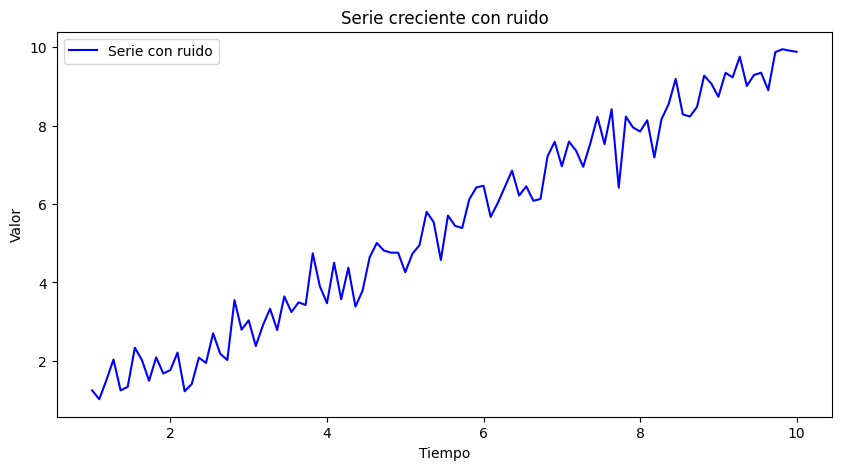

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generamos una serie creciente simple con ruido
np.random.seed(42)
x_series = np.linspace(1, 10, 100)
noise = np.random.normal(0, 0.5, x_series.shape)
y_series = x_series + noise

# Graficamos la serie generada
plt.figure(figsize=(10, 5))
plt.plot(x_series, y_series, label='Serie con ruido', color='b')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Serie creciente con ruido')
plt.legend()
plt.show()


## Inicializamos la red

Vamos a definir una red neuronal recurrente (RNN) de 3 neuronas usando pesos y sesgos aleatorios, tal y como hicimos anteriormente. Esto incluirá pesos de entrada a oculto ($W_{xh}$), pesos de oculto a oculto ($W_{hh}$), y pesos de oculto a salida ($W_{hy}$).

In [2]:
# Número de neuronas en la capa oculta
hidden_size = 3

# Dimensión de la entrada y la salida
input_size = 1
output_size = 1

# Pesos de entrada a oculto
Wxh = np.random.randn(hidden_size, input_size)
print(f"Pesos de entrada a oculto (Wxh):\n{Wxh}\n")

# Pesos de oculto a oculto
Whh = np.random.randn(hidden_size, hidden_size)
print(f"Pesos de oculto a oculto (Whh):\n{Whh}\n")

# Pesos de oculto a salida
Why = np.random.randn(output_size, hidden_size)
print(f"Pesos de oculto a salida (Why):\n{Why}\n")

# Sesgos
bh = np.zeros((hidden_size, 1))
by = np.zeros((output_size, 1))


Pesos de entrada a oculto (Wxh):
[[-1.41537074]
 [-0.42064532]
 [-0.34271452]]

Pesos de oculto a oculto (Whh):
[[-0.80227727 -0.16128571  0.40405086]
 [ 1.8861859   0.17457781  0.25755039]
 [-0.07444592 -1.91877122 -0.02651388]]

Pesos de oculto a salida (Why):
[[ 0.06023021  2.46324211 -0.19236096]]



## Definimos la función de activación

Para nuestras neuronas ocultas usaremos la función tangente hiperbólica ($tanh$) como la función de activación, mientras que la salida será una combinación lineal del estado oculto.

In [3]:
def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

### Preparamos la entrada

A continuación, prepararemos nuestra serie de entrada en fragmentos para entrenar la red. Usaremos la secuencia de entrada generada anteriormente.

In [4]:
# Convertimos la serie en entradas individuales
inputs = [np.array([[y]]) for y in y_series]

# Estado oculto inicial
h_prev = np.zeros((hidden_size, 1))
print(f"Estado oculto inicial (h_prev):\n{h_prev}\n")

Estado oculto inicial (h_prev):
[[0.]
 [0.]
 [0.]]



## Forward Pass de la RNN
Definimos el proceso de forward pass de nuestra RNN para cada paso de tiempo de la secuencia.

La fórmula para el estado oculto es:
$$ h_t = \tanh(W_{xh} \cdot x_t + W_{hh} \cdot h_{t-1} + b_h) $$

La fórmula para la salida es:
$$ y_t = W_{hy} \cdot h_t + b_y $$


In [5]:
# Lista para almacenar los estados ocultos y las salidas
hs = []
ys = []

for t, x_t in enumerate(inputs):
    print(f"Paso de tiempo {t+1}:\n")
    print(f"Entrada x_t:\n{x_t}\n")
    
    # Calcular Wxh * x_t
    Wxh_x = np.dot(Wxh, x_t)
    print(f'Producto de los pesos de entrada a oculto y la entrada (Wxh * x_t):\n{Wxh_x}\n')
    
    # Calcular Whh * h_prev
    Whh_h = np.dot(Whh, h_prev)
    print(f"Producto de los pesos del estado oculto anterior y los pesos de oculto a oculto (Whh * h_prev):\n{Whh_h}\n")
    
    # Suma total antes de activación
    h_linear = Wxh_x + Whh_h + bh
    print(f"Suma total antes de activación (Wxh * x_t + Whh * h_prev + bh):\n{h_linear}\n")
    
    # Aplicar función de activación tanh
    h_t = tanh(h_linear)
    print(f"Estado oculto después de activación h_t = tanh(...):\n{h_t}\n")
    
    # Calcular la salida
    y_t = np.dot(Why, h_t) + by
    print(f"Salida y_t:\n{y_t}\n")
    
    # Almacenar el estado oculto y la salida
    hs.append(h_t)
    ys.append(y_t)
    
    # Actualizar h_prev para el siguiente paso
    h_prev = h_t


Paso de tiempo 1:

Entrada x_t:
[[1.24835708]]

Producto de los pesos de entrada a oculto y la entrada (Wxh * x_t):
[[-1.76688808]
 [-0.52511557]
 [-0.42783009]]

Producto de los pesos del estado oculto anterior y los pesos de oculto a oculto (Whh * h_prev):
[[0.]
 [0.]
 [0.]]

Suma total antes de activación (Wxh * x_t + Whh * h_prev + bh):
[[-1.76688808]
 [-0.52511557]
 [-0.42783009]]

Estado oculto después de activación h_t = tanh(...):
[[-0.94326735]
 [-0.48163856]
 [-0.40350629]]

Salida y_t:
[[-1.16558672]]

Paso de tiempo 2:

Entrada x_t:
[[1.02177694]]

Producto de los pesos de entrada a oculto y la entrada (Wxh * x_t):
[[-1.44619319]
 [-0.42980569]
 [-0.35017779]]

Producto de los pesos del estado oculto anterior y los pesos de oculto a oculto (Whh * h_prev):
[[ 0.67140631]
 [-1.96718419]
 [ 1.00507512]]

Suma total antes de activación (Wxh * x_t + Whh * h_prev + bh):
[[-0.77478688]
 [-2.39698988]
 [ 0.65489733]]

Estado oculto después de activación h_t = tanh(...):
[[-0.649704

## Evaluamos los resultados

Una vez procesada la secuencia, evaluaremos los resultados. Para esto, compararemos las salidas generadas por la RNN con los valores reales de la serie.

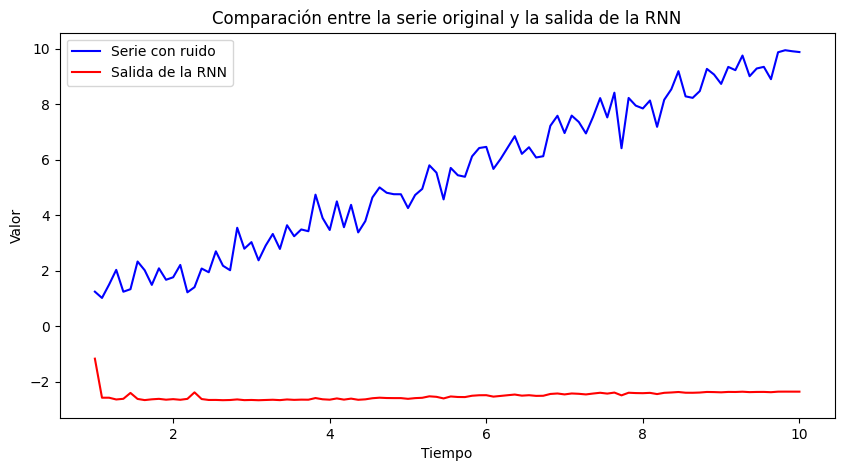

In [6]:
# Convertimos la lista de salidas a un array NumPy para graficar
ys = np.array(ys).squeeze()

# Graficamos la serie original y la salida predicha por la RNN
plt.figure(figsize=(10, 5))
plt.plot(x_series, y_series, label='Serie con ruido', color='b')
plt.plot(x_series, ys, label='Salida de la RNN', color='r')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Comparación entre la serie original y la salida de la RNN')
plt.legend()
plt.show()


# Entrenamiento de la red

Vamos a incluir una fase de entrenamiento. Pero vamos a aumentar el número de estados a 10.

In [7]:
# Número de neuronas en la capa oculta
hidden_size = 10

# Dimensión de la entrada y la salida
input_size = 1
output_size = 1

# Pesos de entrada a oculto
Wxh = np.random.randn(hidden_size, input_size) * 0.01
print(f"Pesos de entrada a oculto (Wxh):\n{Wxh}\n")

# Pesos de oculto a oculto
Whh = np.random.randn(hidden_size, hidden_size) * 0.01
print(f"Pesos de oculto a oculto (Whh):\n{Whh}\n")

# Pesos de oculto a salida
Why = np.random.randn(output_size, hidden_size) * 0.01
print(f"Pesos de oculto a salida (Why):\n{Why}\n")

# Sesgos
bh = np.zeros((hidden_size, 1))
by = np.zeros((output_size, 1))


Pesos de entrada a oculto (Wxh):
[[ 0.00301547]
 [-0.00034712]
 [-0.01168678]
 [ 0.01142823]
 [ 0.00751933]
 [ 0.00791032]
 [-0.00909387]
 [ 0.01402794]
 [-0.01401851]
 [ 0.00586857]]

Pesos de oculto a oculto (Whh):
[[ 0.02190456 -0.00990536 -0.00566298  0.00099651 -0.00503476 -0.01550663
   0.00068563 -0.01062304  0.00473592 -0.00919424]
 [ 0.01549934 -0.00783253 -0.00322062  0.00813517 -0.01230864  0.0022746
   0.01307143 -0.01607483  0.00184634  0.00259883]
 [ 0.00781823 -0.01236951 -0.01320457  0.00521942  0.00296985  0.00250493
   0.00346448 -0.00680025  0.00232254  0.00293072]
 [-0.00714351  0.01865775  0.00473833 -0.01191303  0.00656554 -0.00974682
   0.00787085  0.01158596 -0.00820682  0.00963376]
 [ 0.00412781  0.0082206   0.01896793 -0.00245388 -0.00753736 -0.00889514
  -0.0081581  -0.00077102  0.00341152  0.00276691]
 [ 0.00827183  0.00013002  0.01453534 -0.00264657  0.02720169  0.00625667
  -0.00857158 -0.01070892  0.00482472 -0.00223463]
 [ 0.00714     0.00473238 -0.00072

## Preparamos la entrada

A continuación, prepararemos nuestra serie de entrada en fragmentos para entrenar la red. Usaremos la secuencia de entrada generada anteriormente.

In [8]:
# Convertimos la serie en entradas individuales
inputs = [np.array([[y]]) for y in y_series]

# Estado oculto inicial
h_prev = np.zeros((hidden_size, 1))
print(f"Estado oculto inicial (h_prev):\n{h_prev}\n")

Estado oculto inicial (h_prev):
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]



## Entrenamiento de la red

Ahora agregaremos una fase de entrenamiento para ajustar los pesos de la RNN utilizando retropropagación. El objetivo es minimizar la diferencia entre las salidas generadas y los valores reales de la serie.

La función de pérdida que usaremos será el error cuadrático medio (MSE):

$$ L = \frac{1}{2} \sum_{t} \left(y_{t}^{pred} - y_{t}^{true} \right)^{2} $$

Durante el entrenamiento, usaremos el algoritmo de retropropagación a través del tiempo (BPTT) para actualizar los pesos.

In [9]:
# Hiperparámetros de entrenamiento
learning_rate = 0.001
epochs = 100

for epoch in range(epochs):
    total_loss = 0
    h_prev = np.zeros((hidden_size, 1))
    
    # Forward y backward pass en cada epoch
    for t, x_t in enumerate(inputs):
        # Forward pass
        Wxh_x = np.dot(Wxh, x_t)
        Whh_h = np.dot(Whh, h_prev)
        h_linear = Wxh_x + Whh_h + bh
        h_t = tanh(h_linear)
        y_t = np.dot(Why, h_t) + by
        
        # Cálculo de la pérdida
        loss = 0.5 * (y_t - y_series[t])**2
        total_loss += loss
        
        # Backward pass (retropropagación)
        dL_dy = y_t - y_series[t]
        
        # Gradiente con respecto a Why y by
        dWhy = np.dot(dL_dy, h_t.T)
        dby = dL_dy
        
        # Gradiente con respecto al estado oculto
        dh = np.dot(Why.T, dL_dy) + (np.dot(Whh.T, h_prev) if t > 0 else 0)
        dh_raw = dh * tanh_derivative(h_linear)
        
        # Gradiente con respecto a los pesos y sesgos de la capa oculta
        dWxh = np.dot(dh_raw, x_t.T)
        dWhh = np.dot(dh_raw, h_prev.T)
        dbh = dh_raw
        
        # Actualización de los pesos y sesgos
        Why -= learning_rate * dWhy
        by -= learning_rate * dby
        Wxh -= learning_rate * dWxh
        Whh -= learning_rate * dWhh
        bh -= learning_rate * dbh
        
        # Actualizar el estado oculto previo
        h_prev = h_t

    # Imprimir la pérdida cada 10 épocas
    if epoch % 10 == 0:
        print(f"Época {epoch}, Pérdida total: {total_loss.squeeze()}")


Época 0, Pérdida total: 1608.9066974061748
Época 10, Pérdida total: 28.99879909341303
Época 20, Pérdida total: 6.172388081489594
Época 30, Pérdida total: 4.553491942485653
Época 40, Pérdida total: 4.404308562532335
Época 50, Pérdida total: 3.914343953469312
Época 60, Pérdida total: 3.3920595491764476
Época 70, Pérdida total: 2.975923483341559
Época 80, Pérdida total: 2.6768999940305456
Época 90, Pérdida total: 2.4592864426446224


## Evaluación de los resultados

Después de entrenar la RNN, haremos un forward pass nuevamente para evaluar los resultados y compararlos con la serie original.

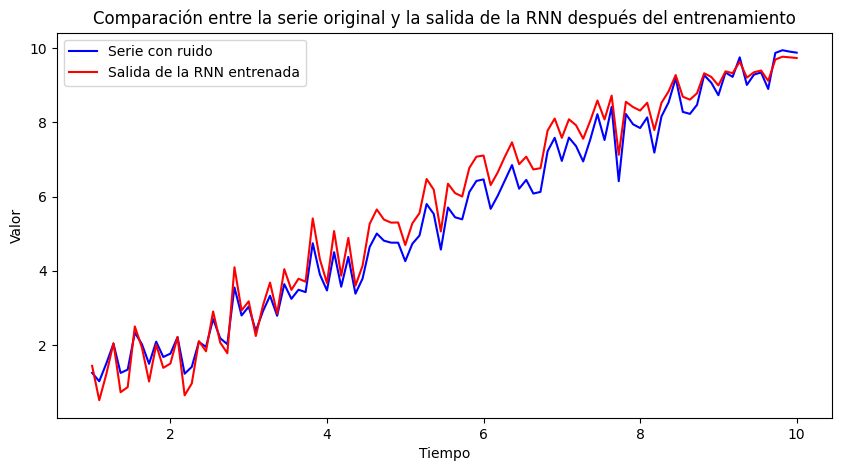

In [10]:
# Forward pass después del entrenamiento
hs = []
ys = []

h_prev = np.zeros((hidden_size, 1))
for t, x_t in enumerate(inputs):
    # Forward pass
    Wxh_x = np.dot(Wxh, x_t)
    Whh_h = np.dot(Whh, h_prev)
    h_linear = Wxh_x + Whh_h + bh
    h_t = tanh(h_linear)
    y_t = np.dot(Why, h_t) + by
    
    # Almacenar el estado oculto y la salida
    hs.append(h_t)
    ys.append(y_t)
    
    # Actualizar h_prev para el siguiente paso
    h_prev = h_t

# Convertimos la lista de salidas a un array NumPy para graficar
ys = np.array(ys).squeeze()

# Graficamos la serie original y la salida predicha por la RNN
plt.figure(figsize=(10, 5))
plt.plot(x_series, y_series, label='Serie con ruido', color='b')
plt.plot(x_series, ys, label='Salida de la RNN entrenada', color='r')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Comparación entre la serie original y la salida de la RNN después del entrenamiento')
plt.legend()
plt.show()


## Predicción a futuro

Utilizaremos la última salida predicha para hacer la predicción del siguiente paso, y así sucesivamente, para obtener una secuencia de 50 pasos.

In [11]:
print(inputs[-1])

print(Wxh_x)

[[9.88270643]]
[[ 0.76463836]
 [ 1.86420411]
 [-1.61978451]
 [ 1.69007919]
 [ 0.41014276]
 [ 2.0572933 ]
 [-1.41784381]
 [ 1.22273564]
 [-0.94577556]
 [ 1.04449842]]


In [12]:
# Lista para almacenar los valores predichos
predictions = []

# Inicializamos con el último estado oculto de la secuencia de entrenamiento
h_prev = hs[-1]
x_t = inputs[-1]  # Última entrada real como punto de partida

for t in range(10):
    # Ajustar la forma de x_t para asegurarnos de que sea correcta
    x_t = x_t.reshape(input_size, 1)

    # Forward pass para predicción
    Wxh_x = np.dot(Wxh, x_t)
    Whh_h = np.dot(Whh, h_prev)
    h_linear = Wxh_x + Whh_h + bh
    h_t = tanh(h_linear)
    y_t = np.dot(Why, h_t) + by
    
    # Almacenar la predicción
    predictions.append(y_t.item())
    
    # La salida actual se convierte en la entrada para el próximo paso
    x_t = np.array([[y_t]])
    
    # Actualizar h_prev para el siguiente paso
    h_prev = h_t




## Evaluación de las predicciones

Ahora que tenemos nuestras predicciones, vamos a graficarlas junto con la serie original y las salidas de la RNN durante el entrenamiento para ver cómo la red ha logrado predecir los futuros valores.

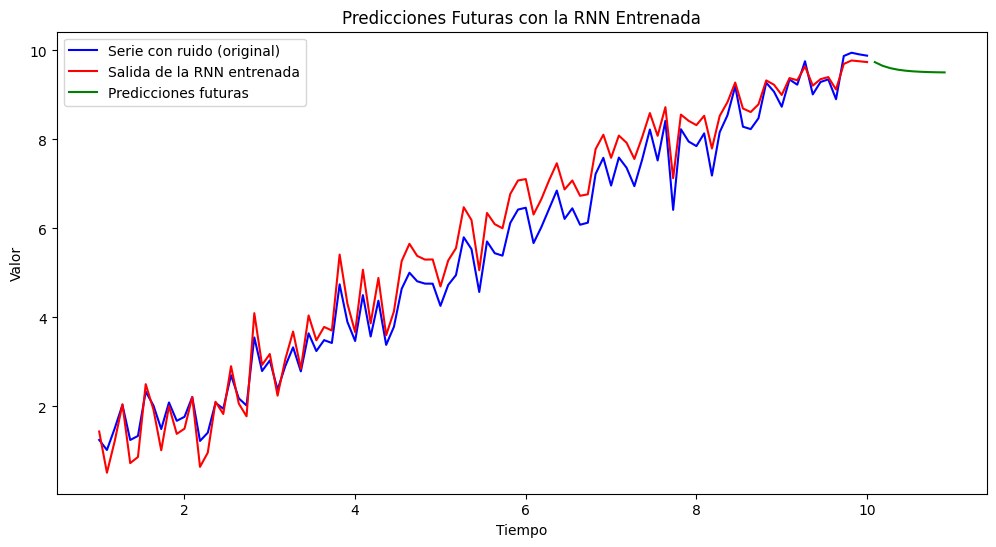

In [13]:
# Calculamos el tamaño del paso temporal en la serie original
delta_t = (x_series[-1] - x_series[0]) / (len(x_series) - 1)

# Creamos un eje de tiempo extendido a partir del último valor de la serie original
t_extended = [x_series[-1] + delta_t * (i + 1) for i in range(10)]

# Graficamos la serie original, la salida de la RNN durante el entrenamiento y las predicciones
plt.figure(figsize=(12, 6))
plt.plot(x_series, y_series, label='Serie con ruido (original)', color='b')
plt.plot(x_series, ys, label='Salida de la RNN entrenada', color='r')
plt.plot(t_extended, predictions, label='Predicciones futuras', color='g')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Predicciones Futuras con la RNN Entrenada')
plt.legend()
plt.show()

